# Goal

The goal of this notebook is to perform automatic segmentation.

- Save to an image stack so that we can generate segmentation a lot easier.

# Background

- [DB](http://www.chimpanzeebrain.org/mri-datasets-for-direct-download)
- [More Monkey Atlas](http://resource.loni.usc.edu/resources/atlases-downloads/)
- [Simple ITK Image Basics](http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html)

I will try to following these VTK and ITK tutorials:
- [Image Segmentation with Python and SimpleITK](https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/)
    - [Jupyter notebook](http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141001_SegmentationSimpleITK/Material/SegmentationSimpleITK.ipynb)
- [SimpleITK Notebooks](http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/)
    
Articles to read:
- [MRI Segmentation of the Human Brain: Challenges, Methods, and Applications](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4402572/)
- [Automatic Segmentation of Newborn Brain MRI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2945911/)
- [Methods on Skull Stripping of MRI Head Scan Images—a Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4879034/)
- [MRI Basics](http://casemed.case.edu/clerkships/neurology/web%20neurorad/mri%20basics.htm)
 - [Power POinst 3D Slicer](https://www.slicer.org/w/images/2/24/AutomaticSegmentation_SoniaPujol.pdf)

# Imports

In [1]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import scipy.misc

# Functions

In [2]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [3]:
def showSegmentation(sliceNum=90,lstSeeds =[(75,60)],lower = 0,upper=40 ):
    # Get slice
    idxSlice = sliceNum
    imgOriginal = image[:,:,idxSlice]

    # Apply smoothing
    imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                        timeStep=0.125,
                                        numberOfIterations=5)
    sitk_show(imgSmooth)

    # Get segmentation
#     lstSeeds = [(75,60)]

    imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                                  seedList=lstSeeds, 
                                                  lower=lower, 
                                                  upper=upper,
                                                  replaceValue=labelWhiteMatter)

    # Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
    imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

    # Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
    sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter))

    # show segmentation
    sitk_show(imgWhiteMatter)

# Parameters

In [4]:
inpath = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Monkey//10 sample Chimpanzee 3T for NCBR website//Male_Fritz.nii'
# inpath = "C://Cerebral//_MarioSandBox//DB//medicalHolography//UofT Mouse Brain//C57brain.mnc"

In [5]:
# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 50

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 1
labelGrayMatter = 2

# Reading Data

In [6]:
reader = SimpleITK.ImageFileReader()
image = SimpleITK.ReadImage(inpath)

# Display the data

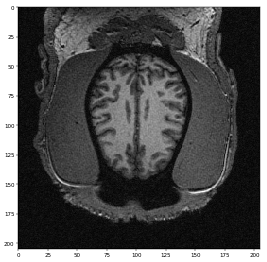

In [7]:
idxSlice = 50
imgOriginal = image[:,:,idxSlice]
sitk_show(imgOriginal)

# Smoothing

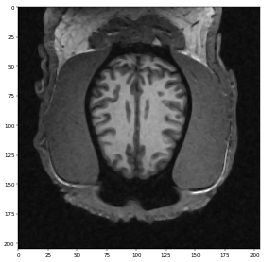

In [8]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)

# blurFilter = SimpleITK.CurvatureFlowImageFilter()
# blurFilter.SetNumberOfIterations(5)
# blurFilter.SetTimeStep(0.125)
# imgSmooth = blurFilter.Execute(imgOriginal)

sitk_show(imgSmooth)

We are basically just smoothing the images so that it doesn't have that grainy look to it.

# Statistics

In [9]:
np.shape(SimpleITK.GetArrayFromImage(image))

(128L, 256L, 256L)

Let's grab all 256 images and see where the the start of the brain is and where it ends.  Also we need to identify the largest part of the brain so we can perform some masking

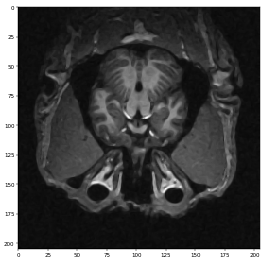

In [10]:
idxSlice = 90
imgOriginal = image[:,:,idxSlice]
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)
sitk_show(imgSmooth)

In [11]:
Start = 17
MaxDilation = 
End = 105

SyntaxError: invalid syntax (<ipython-input-11-270f5497c586>, line 2)

In [14]:
outDir = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//Monkey//JPG Stacks//'

In [15]:
idxSlice = 90
imgOriginal = image[:,:,idxSlice]
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)
nda = SimpleITK.GetArrayFromImage(imgSmooth)
scipy.misc.imsave(outDir+'{}.jpg'.format(idxSlice), nda)

C:\Users\HP\Anaconda2\envs\py27\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys


## Looping

In [16]:
[numSlices,x,y] = np.shape(SimpleITK.GetArrayFromImage(image))

In [18]:
for idxSlice in xrange(numSlices):
    imgOriginal = image[:,:,idxSlice]
    imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                        timeStep=0.125,
                                        numberOfIterations=5)
    nda = SimpleITK.GetArrayFromImage(imgSmooth)
    scipy.misc.imsave(outDir+'{}.jpg'.format(idxSlice), nda)   

C:\Users\HP\Anaconda2\envs\py27\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys
